# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Этап 1.**  
Откроем файл с данными и изучим общую информацию.  
Построим общую гистограмму для всех столбцов таблицы.  

**Этап 2.**  
Предобработка данных.  
Найдём и изучим пропущенные значения в столбцах.  
Определим, в каких столбцах есть пропуски.  
Заполним пропущенные значения там, где это возможно.  
Рассмотрим типы данных в каждом столбце.  
Найдем столбцы, в которых нужно изменить тип данных.  
Преобразуем тип данных в выбранных столбцах.  
Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.  
Найдем и устраним редкие и выбивающиеся значения.  

**Этап 3.**  
Добавим в таблицу новые столбцы со следующими параметрами:  
- цена одного квадратного метра  
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)  
- месяц публикации объявления  
- год публикации объявления  
- тип этажа квартиры (значения — «‎первый», «последний», «другой»)  
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)  

**Этап 4.**  
Проведем исследовательский анализ данных и изучим следующие параметры объектов:  
- общая площадь  
- жилая площадь  
- площадь кухни  
- цена объекта  
- количество комнат  
- высота потолков  
- этаж квартиры  
- тип этажа квартиры («первый», «последний», «другой»)  
- общее количество этажей в доме  
- расстояние до центра города в метрах  
- расстояние до ближайшего аэропорта  
- расстояние до ближайшего парка  
- день и месяц публикации объявления  

Построим отдельные гистограммы для каждого из этих параметров.  
Изучим, как быстро продавались квартиры и построим гистрограмму.  
Посчитаем среднее и медиану.  

Изучим, зависит ли цена от:  
- общей площади  
- жилой площади  
- площади кухни  
- количества комнат  
- этажа, на котором расположена квартира (первый, последний, другой)  
- даты размещения (день недели, месяц, год)  

Построим графики, которые покажут зависимость цены от указанных выше параметров.  
Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.  
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.  
Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.  

**Этап 5.**  
Опишем полученные результаты и зафиксируем основной вывод проведённого исследования.

### Откроем файл с данными и изучимобщую информацию. 

In [1]:
import pandas as pd
import re
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

try:
    df = pd.read_csv ('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')  #читаем файл, применяем разделитель между значениями
except FileNotFoundError:  
    df = pd.read_csv ('real_estate_data.csv', sep='\t')

df.head() #выводим первые 5 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.tail() #выводим последние 5 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe() #посмотрим описательную статистику

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
df.info() #выводим информацию обо всём датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

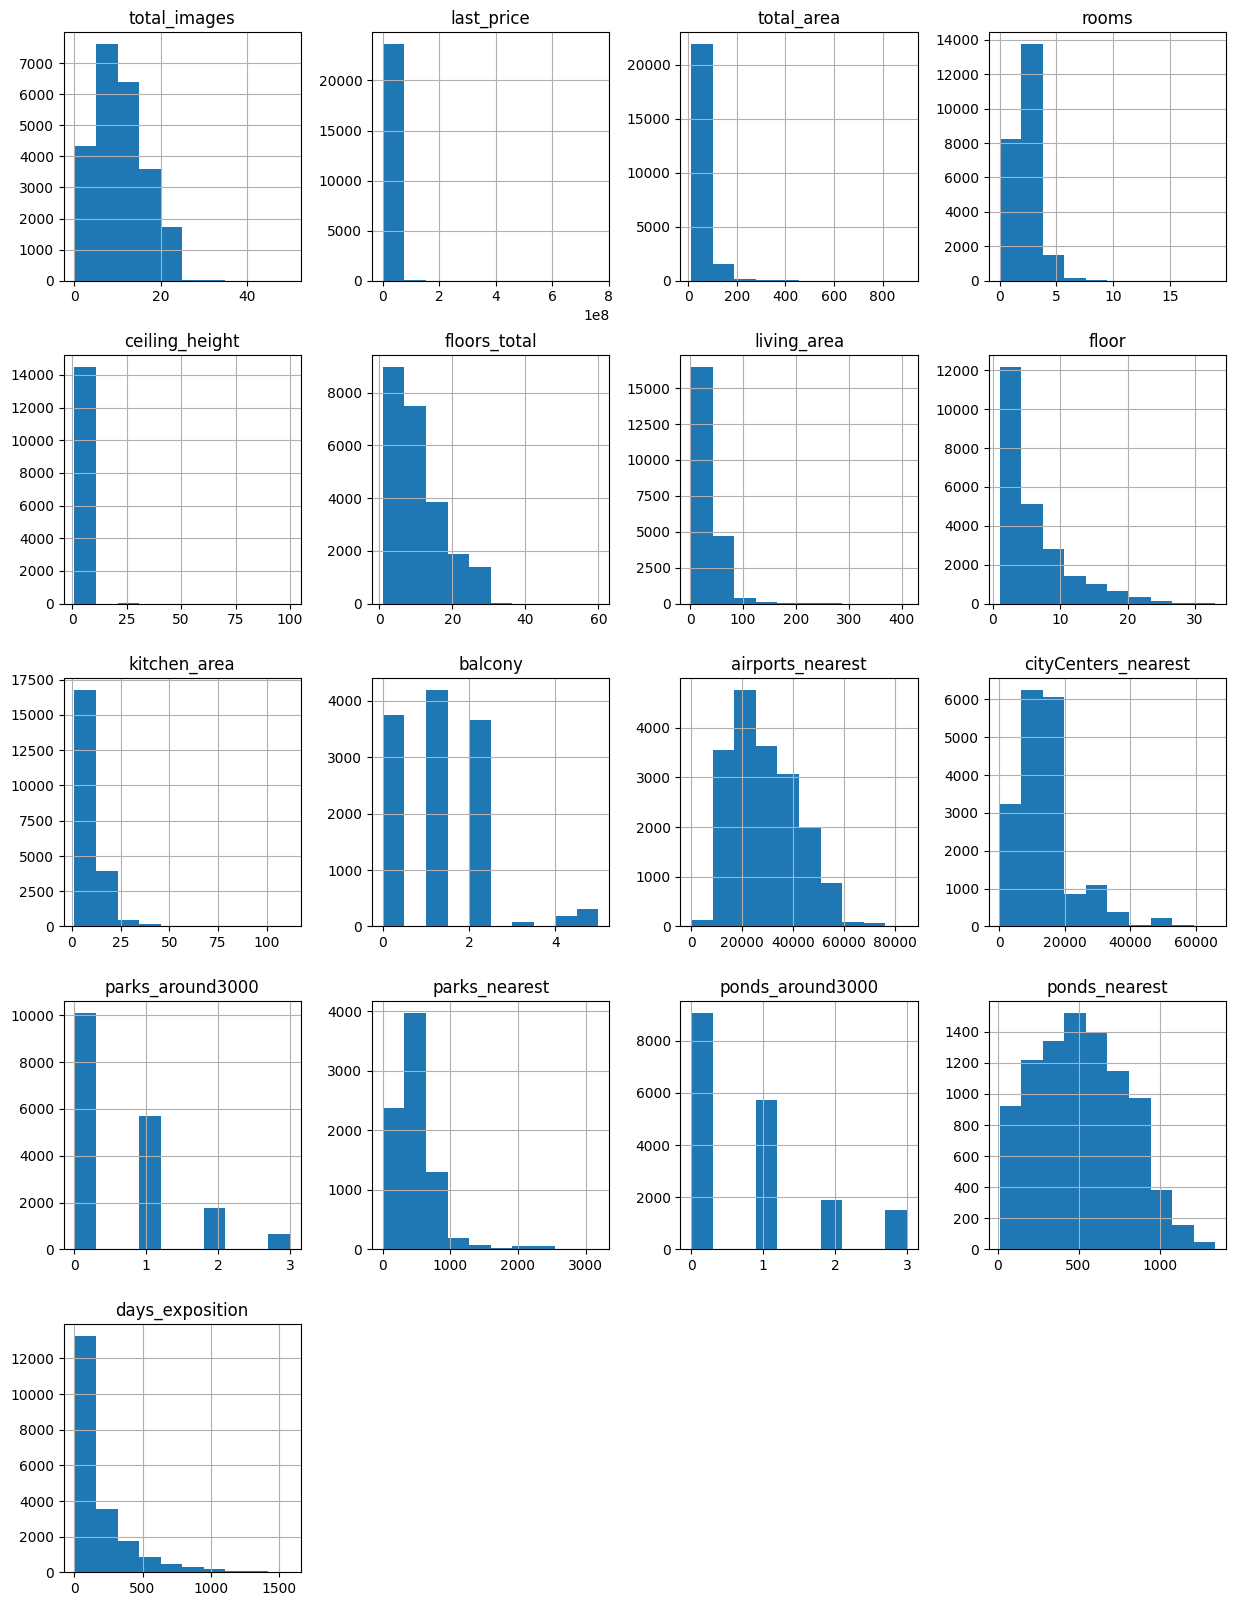

In [5]:
df.hist(figsize=(15, 20))
plt.show()#строим гистрограмму всех показателей датафрема

При первичном изучении данных заметно большое количество пропущенных значений.  
Также нарушена типизация данных, а именно:  
first_day_exposition - должен быть тип datetime.  
floors_total - должен быть тип int.  
cityCenters_nearest - верхний регистр в названии.  
parks_around3000 - тип должен быть int.  
ponds_around3000 - тип должен быть int.  
days_exposition - тип должен быть int.  
last_price - удобнее читать с типом int.

### Предобработка данных

In [6]:
df.isna().mean() #Определим долю пропущенных значений в таблице

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [7]:
#Проверим колличество пропусков в %
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [8]:
df.isna().sum()#Для наглядности выведем кол-во пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Причины отсутствия данных в столбцах таблицы:  
is_apartment - наибольшее количество пропусков. Пропуск данных может означать, что данное жилое помещение не является аппартаментом.  
ceiling_height - важный параметр, столбец необходимо заполнять средними значениями по населённому пункту месторасположения квартиры.  
floors_total - важная информация, вероятно при подачи данных не был отмечен обязательным параметром. Постараемся расчитать по местоположению квартиры.  
living_area - важная информация, вероятно при подачи данных не был отмечен обязательным параметром.  
balcony - пропуск вероятнее всего говорит об отсутствии балконов в квартире.   
kitchen_area - пропуски могут быть в квартирах-студиях, где жилая площадь и площадь кухни объеденины.  
locality_name - наименьшая доля пропуска данных. Считаю, что заполнять их необходимости нет и можно их удалить, влияние на дальнейший анализ не будет заметен.  
airports_nearest - вероятно ближайший аэропорт находится слишком далеко и данные для заполнения были не обязательны.  
cityCenters_nearest - вероятно центр города находится слишком далеко или данные для заполнения были не обязательны.  
parks_around3000 и ponds_around3000 - возможно парков и водоёмов в радиусе 3км нет.Не считаю нужным удалять и заполнять данные пропуски.  
parks_nearest и ponds_nearest - возможно парки и водоёмы слишком далеко, чтобы указывать данных о них. Не считаю нужным удалять и заполнять данные пропуски.  
days_exposition - несвоевременная отметка на онлайн-ресурсе о закрытии сделки можем привести к отсутствию данных в данном столбце, так и к слишком большим показателям. Можно заполнить пропуски нулевыми показателями, для дальнейшего анализа не повредит.

In [9]:
#Заполняем пропуски days_exposition нулевыми значениями и меняем тип данных
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')
print(df['days_exposition'].unique()) #Проверяем изменения по уникальным значениям

[   0   81  558 ... 1360 1007  971]


In [10]:
#Изменим тип столбца с датой в формат даты без времени (время не указано)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
#Изменим тип столбца с ценой на int
df['last_price'] = df['last_price'].astype('int')

In [11]:
#Заполняем пропуски balcony нулевыми значениями и меняем тип данных
df['balcony'] = df['balcony'].fillna(0).astype('int')
print(df['balcony'].unique()) #Проверяем изменения по уникальным значениям

[0 2 1 5 4 3]


In [12]:
#Заменим пропуски is_apartment значениями False, т.к. вероятно пропуск означает, что помещение - не аппартаменты
df['is_apartment'] = df['is_apartment'].fillna(False)
print(df['is_apartment'].unique()) #Проверяем изменения по уникальным значениям

[False  True]


In [13]:
#Переименнуем столбец с верхним регистром
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

In [14]:
#Удалим строки, где количество комнат указано 0
df.drop(df[df['rooms'] == 0].index, inplace=True)
print(df['rooms'].unique()) #Проверяем изменения по уникальным значениям

[ 3  1  2  4  5  6  7 11  8 14 10 15  9 19 16 12]


In [15]:
#Удалим строки, где не указана этажность дома
df.drop(df[df['floors_total'].isnull()].index, inplace=True)
print(df['floors_total'].unique()) #Проверяем изменения по уникальным значениям

#Изменим тип столбца с кол-вом этажей в доме на int
df['floors_total'] = df['floors_total'].astype('int')

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52. 37.]


In [16]:
#Удалим строки без указания населенного пункта
df=df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum() #Проверяем удаление

0

In [17]:
#Заполним пропуски общей площади и площади кухни
for i in df['rooms'].unique():
    df.loc[(df['total_area'].isna()) & (df['rooms'] == i), 'total_area'] = df[df['rooms'] == i]['total_area'].median()
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == i), 'kitchen_area'] = df[df['rooms'] == i]['kitchen_area'].median()

#Заполним пропуски в жилой площади (из общей площади вычитаем нежилую площадь - примерно 2 кухни)
df.loc[df['living_area'].isna(), 'living_area'] = df.loc[df['living_area'].isna(), 'total_area'] - 2 * df.loc[df['living_area'].isna(), 'kitchen_area']
    
print('Средняя площадь кухни', df['kitchen_area'].median())
print('Средняя жилая площадь', df['living_area'].median())
print('Средняя общая площадь', df['total_area'].median())

print(df['total_area'].isna().sum()) #Проверяем заполнение
print(df['kitchen_area'].isna().sum()) #Проверяем заполнение
print(df['living_area'].isna().sum()) #Проверяем заполнение

Средняя площадь кухни 9.0
Средняя жилая площадь 30.2
Средняя общая площадь 52.0
0
0
0


In [18]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8972
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5447
city_centers_nearest     5424
parks_around3000         5423
parks_nearest           15369
ponds_around3000         5423
ponds_nearest           14403
days_exposition             0
dtype: int64

In [19]:
#уменьшим пропуски в столбце airports_nearest заполнив по возможности средним значением по местности
for i in df['locality_name'].unique():
    df.loc[(df['locality_name'] == i) & (df['airports_nearest'].isna()), 'airports_nearest'] = df.loc[(df['locality_name'] == i), 'airports_nearest'].mean()

In [20]:
df.isna().sum() #91 пропуск заполнили

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8972
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5356
city_centers_nearest     5424
parks_around3000         5423
parks_nearest           15369
ponds_around3000         5423
ponds_nearest           14403
days_exposition             0
dtype: int64

In [21]:
df['ceiling_height'].isnull().sum() #посчитаем сколько пропущенных значений с высотой потолков

8972

In [22]:
#избавимся от аномально высоких потолков
df.loc[df['ceiling_height']>10, 'ceiling_height'] /= 10
df['ceiling_height'].unique() #проверяем

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [23]:
#напишем функцию, которая позволит объединить квартиры по удалённости от центра для дальнейшего расчёта средней высоты потолков
def fillna_ceiling_height(row):
    try:
        if row['city_centers_nearest'] < 2500:
            return 'самый центр'
        if row['city_centers_nearest'] < 5000:
            return 'центр'
        if row['city_centers_nearest'] < 17000:
            return 'в пределах города'
        if row['city_centers_nearest'] >= 17000:
            return 'область'
    except:
        return 'нет информации'
df['fillna_ceiling_height'] = df.apply(fillna_ceiling_height, axis = 1)  
df['fillna_ceiling_height'].value_counts()

в пределах города    12115
область               3779
центр                 1527
самый центр            526
Name: fillna_ceiling_height, dtype: int64

In [24]:
df[['locality_name', 'city_centers_nearest', 'fillna_ceiling_height', 'ceiling_height']].head(10) #посмотрим, что получилось

,locality_name,city_centers_nearest,fillna_ceiling_height,ceiling_height
0,Санкт-Петербург,16028.0,в пределах города,2.70
1,посёлок Шушары,18603.0,область,NaN
2,Санкт-Петербург,13933.0,в пределах города,NaN
3,Санкт-Петербург,6800.0,в пределах города,NaN
4,Санкт-Петербург,8098.0,в пределах города,3.03
5,городской посёлок Янино-1,NaN,None,NaN
6,посёлок Парголово,19143.0,область,NaN
7,Санкт-Петербург,11634.0,в пределах города,NaN
8,посёлок Мурино,NaN,None,NaN
9,Санкт-Петербург,15008.0,в пределах города,2.50


In [25]:
df.groupby('fillna_ceiling_height')['ceiling_height'].mean().sort_values(ascending=False).to_frame() #считаем среднюю высоты потолков

,ceiling_height
fillna_ceiling_height,
самый центр,3.235189
центр,3.136065
в пределах города,2.704514
область,2.655883


In [26]:
list = ['самый центр', 'центр', 'в пределах города', 'область'] #пишем функию
for i in list: #будем присваивать среднее значение (по категориям) высоты потолков объявлениям, где было указано расстояние до центра
    value_for_filling = df.groupby('fillna_ceiling_height')['ceiling_height'].mean().get(key=i)
    df['ceiling_height'] = df.groupby('fillna_ceiling_height')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))

In [27]:
df[['locality_name', 'city_centers_nearest', 'fillna_ceiling_height', 'ceiling_height']].head(10) #проверяем присвоение

,locality_name,city_centers_nearest,fillna_ceiling_height,ceiling_height
0,Санкт-Петербург,16028.0,в пределах города,2.700000
1,посёлок Шушары,18603.0,область,2.655883
2,Санкт-Петербург,13933.0,в пределах города,2.704514
3,Санкт-Петербург,6800.0,в пределах города,2.704514
4,Санкт-Петербург,8098.0,в пределах города,3.030000
5,городской посёлок Янино-1,NaN,None,NaN
6,посёлок Парголово,19143.0,область,2.655883
7,Санкт-Петербург,11634.0,в пределах города,2.704514
8,посёлок Мурино,NaN,None,NaN
9,Санкт-Петербург,15008.0,в пределах города,2.500000


In [28]:
df['ceiling_height'].isnull().sum()

5424

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
#Поменяем пропуски в высоте потолков на значения, относительно своего района:
for i in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == i, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == i), 'ceiling_height'] = median
    
#остатки заполним общей медианой по Лен. области 
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median ()

df['ceiling_height'].isna().sum() #проверяем заполнение пропусков

0

In [31]:
 df.isna().sum() #выводим проверку заполнения проспуков всех столбцов 

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5356
city_centers_nearest      5424
parks_around3000          5423
parks_nearest            15369
ponds_around3000          5423
ponds_nearest            14403
days_exposition              0
fillna_ceiling_height     5424
dtype: int64

Переходим к работе с дубликатами.

In [32]:
df['locality_name'].duplicated().sum() #посчитаем кол-во дубликатов

23009

In [33]:
df['locality_name'] = (df['locality_name']
                         .str.lower()
                         .str.replace('ё', 'е', regex=True)
                         .str.rsplit(" ", 1).str[-1] #устраним дубликаты в названиях населённых пунктов на последнее значение 
                        )

df['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'бор', 'гатчина', 'федоровское', 'выборг',
       'кронштадт', 'кировск', 'девяткино', 'металлострой', 'лебяжье',
       'сиверский', 'молодцово', 'кузьмоловский', 'ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск', 'оржицы',
       'кальтино', 'романовка', 'бугры', 'рощино', 'кириши', 'луга',
       'волосово', 'отрадное', 'павлово', 'оредеж', 'копорье',
       'молодежное', 'тихвин', 'победа', 'нурма', 'синявино', 'тосно',
       'стрельна', 'бокситогорск', 'александровская', 'лопухинка',
       'пикалево', 'терв

В данном блоке мы описали причины отсутствия данных в столбцах таблицы и устранили/заполнили данные пропуски по-максимум.
Исправили ошибки в типизации данных, привели в соответствие с нормальным и удобным форматом для дальнейшей работы.
Устранили неявные дубликаты и проработали аномальные значения.
Теперь данные располагают для корректного дальнейго анализа.

### Посчитаем и добавим в таблицу новые столбцы

Добавим столбец с ценой за однин квадратный метр в каждом объявлении

In [34]:
df['price_meter'] = df['last_price'] / df['total_area'] #разделим цену на общую площадь помещения
df['price_meter'] = df['price_meter'].round() #округлим значения

Добавим колонки со следующими данными:  
День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)  
Месяц публикации объявления  
Год публикации объявления  

In [35]:
#добавим столбцы c днем
df['day_of_week_exposition'] = df['first_day_exposition'].dt.weekday #0 — понедельник, 1 — вторник и так далее
df['month_exposition'] = df['first_day_exposition'].dt.month_name() #месяц публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year #год публикации объявления

Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)

In [36]:
def new_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        return 'нет информации'
df['new_floor'] = df.apply(new_floor, axis = 1)  
df['new_floor'].value_counts()

другой       17161
последний     3319
первый        2891
Name: new_floor, dtype: int64

Добавим столбец с расстоянием до центра города в километрах (переведем из м в км и округлим до целых значений).

In [37]:
df['city_center_km'] = df['city_centers_nearest'] / 1000
df['city_center_km'] = df['city_center_km'].round()
df['nearest_airport_km'] = df['airports_nearest'] / 1000
df['nearest_airport_km'] = df['nearest_airport_km'].round()
df['nearest_park_km'] = df['parks_nearest'] / 1000
df['nearest_park_km'] = df['nearest_park_km'].round()
df['nearest_pond_km'] = df['ponds_nearest'] / 1000
df['nearest_pond_km'] = df['nearest_pond_km'].round()
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,fillna_ceiling_height,price_meter,day_of_week_exposition,month_exposition,year_exposition,new_floor,city_center_km,nearest_airport_km,nearest_park_km,nearest_pond_km
0,20,13000000,108.00,2019-03-07,3,2.700000,16,51.00,8,False,...,в пределах города,120370.0,3,March,2019,другой,16.0,19.0,0.0,1.0
1,7,3350000,40.40,2018-12-04,1,2.655883,11,18.60,1,False,...,область,82921.0,1,December,2018,первый,19.0,13.0,NaN,NaN
2,10,5196000,56.00,2015-08-20,2,2.704514,5,34.30,4,False,...,в пределах города,92786.0,3,August,2015,другой,14.0,22.0,0.0,1.0
3,0,64900000,159.00,2015-07-24,3,2.704514,14,140.00,9,False,...,в пределах города,408176.0,4,July,2015,другой,7.0,28.0,0.0,0.0
4,2,10000000,100.00,2018-06-19,2,3.030000,14,32.00,13,False,...,в пределах города,100000.0,1,June,2018,другой,8.0,32.0,0.0,0.0
5,10,2890000,30.40,2018-09-10,1,2.704514,12,14.40,5,False,...,None,95066.0,0,September,2018,другой,NaN,NaN,NaN,NaN
6,6,3700000,37.30,2017-11-02,1,2.655883,26,10.60,6,False,...,область,99196.0,3,November,2017,другой,19.0,53.0,NaN,NaN
7,5,7915000,71.60,2019-04-18,2,2.704514,24,33.80,22,False,...,в пределах города,110545.0,3,April,2019,другой,12.0,24.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.704514,27,15.43,26,False,...,None,87455.0,2,May,2018,другой,NaN,NaN,NaN,NaN
9,18,5400000,61.00,2017-02-26,3,2.500000,9,43.60,7,False,...,в пределах города,88525.0,6,February,2017,другой,15.0,51.0,NaN,NaN


Теперь в нашей таблице добавились новые столбцы:  

Цена одного квадратного метра 'price_meter'  
Расстояние до центра города в километрах 'city_center_km'  
Расстояние до аэропорта в километрах 'nearest_airport_km'  
Расстояние до парка в километрах 'nearest_park_km'  
Расстояние до водоёма в километрах 'nearest_pond_km'  
Тип этажа квартиры 'new_floor'  
День недели публикации объявления (0 — понедельник, 1 — вторник и так далее) 'day_of_week_exposition'  
Месяц публикации объявления 'month_exposition'  
Год публикации объявления 'year_exposition'  

### Проведем исследовательский анализ данных

Изучим следующие параметры объектов:  
- общая площадь;  
- жилая площадь;  
- площадь кухни;  
- цена объекта;  
- количество комнат;  
- высота потолков;  
- этаж квартиры;  
- тип этажа квартиры («первый», «последний», «другой»);  
- общее количество этажей в доме;  
- расстояние до центра города в метрах;  
- расстояние до ближайшего аэропорта;  
- расстояние до ближайшего парка;  
- день и месяц публикации объявления.  

Построим отдельные гистограммы для каждого из этих параметров.  

In [38]:
df.describe() #посмотрим распределение значений в каждом столбце

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_of_week_exposition,year_exposition,city_center_km,nearest_airport_km,nearest_park_km,nearest_pond_km
count,23371.000000,2.337100e+04,23371.000000,23371.000000,23371.000000,23371.000000,23371.000000,23371.000000,23371.000000,23371.000000,...,17948.000000,8968.000000,23371.000000,2.337100e+04,23371.000000,23371.000000,17947.000000,18015.000000,8002.000000,8968.000000
mean,9.895340,6.566584e+06,60.580161,2.087844,2.736771,10.624235,35.256465,5.856061,10.454371,0.590090,...,0.769166,518.244759,156.868855,9.933031e+04,2.566129,2017.370031,14.191898,28.828809,0.441265,0.504126
std,5.682868,1.094248e+07,35.613640,1.066362,0.233323,6.567545,24.284339,4.851830,5.665974,0.960162,...,0.939071,278.036420,213.871607,5.052668e+04,1.789315,1.039403,8.639353,12.605025,0.545504,0.500011
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,-26.000000,1.000000,1.300000,0.000000,...,0.000000,13.000000,0.000000,1.120000e+02,0.000000,2014.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.450000e+06,40.200000,1.000000,2.655883,5.000000,19.000000,2.000000,7.300000,0.000000,...,0.000000,293.000000,22.000000,7.647100e+04,1.000000,2017.000000,9.000000,19.000000,0.000000,0.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.704514,9.000000,30.200000,4.000000,9.000000,0.000000,...,0.000000,503.000000,74.000000,9.489100e+04,3.000000,2017.000000,13.000000,27.000000,0.000000,1.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.704514,16.000000,43.000000,8.000000,11.500000,1.000000,...,1.000000,730.000000,199.000000,1.140540e+05,4.000000,2018.000000,16.000000,37.000000,1.000000,1.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,511.000000,33.000000,112.000000,5.000000,...,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,2019.000000,66.000000,85.000000,3.000000,1.000000


count    23371.000000
mean         2.566129
std          1.789315
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week_exposition, dtype: float64

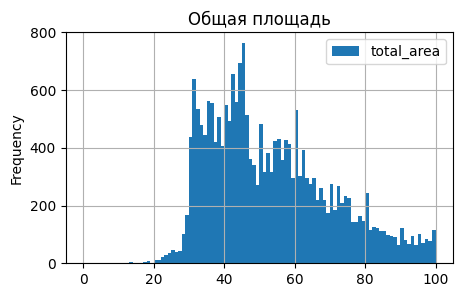

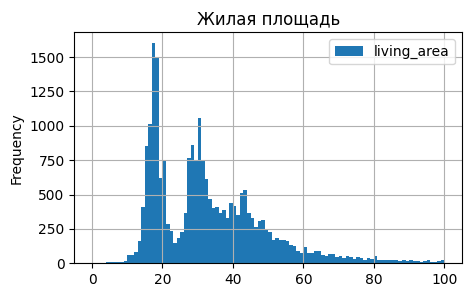

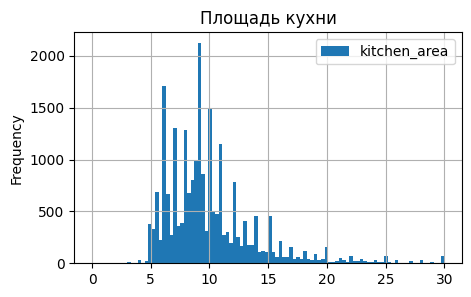

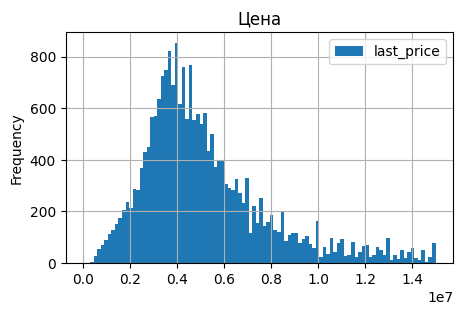

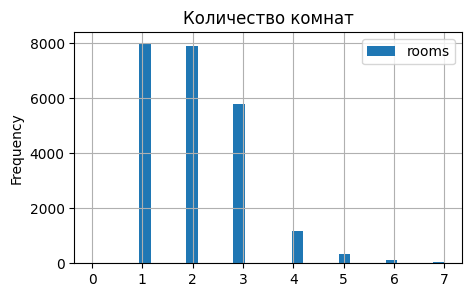

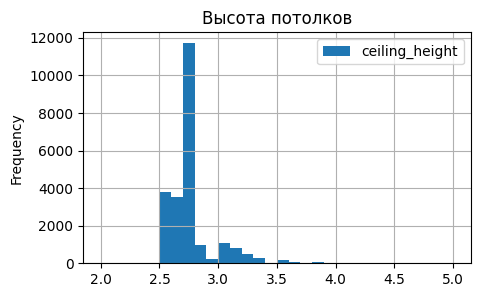

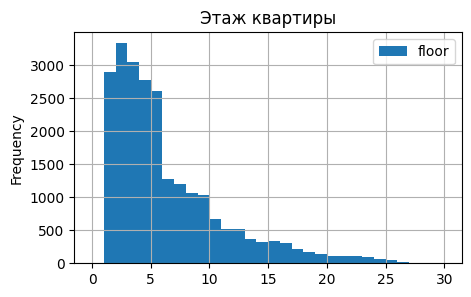

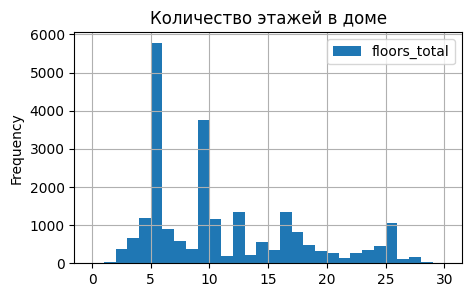

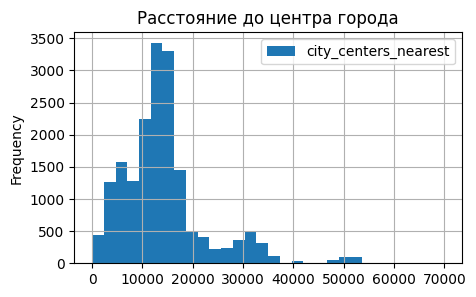

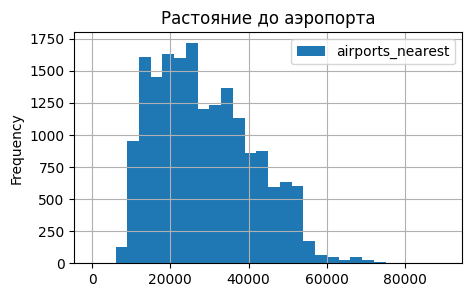

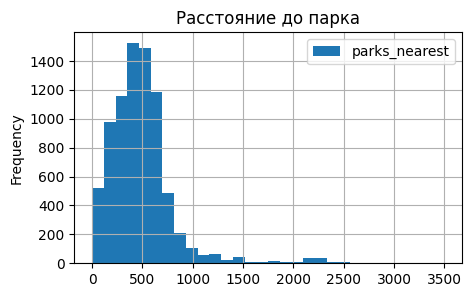

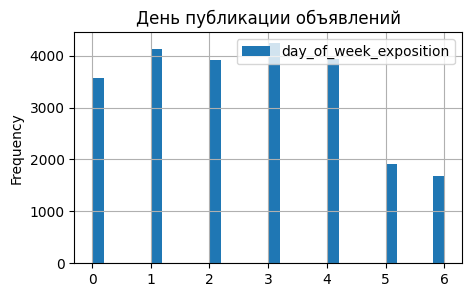

In [39]:
#изучим общую площадь
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100), title = 'Общая площадь')
df['total_area'].describe()
#распределение данных нормальное, есть выбросы но они не сильно влияют на данные, 
#по гистограмме кроме распределения нечего больше указать, с помошью describe получили общее представление

#изучим жилую площадь
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100), title = 'Жилая площадь')
df['living_area'].describe()
#распределение данных показывает 2 пика... не знаю, с чем это связано

#изучим площадь кухни
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,30), title = 'Площадь кухни')
df['kitchen_area'].describe()
#распределение данных нормальное, есть выбросы но они не сильно влияют на данные

#изучим цену
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3), title = 'Цена')
df['last_price'].describe()
#с данными все впорядке но значения выводятся в экспоненциальной записи чисел

#изучим число комнат
df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, range = (0, 7), figsize = (5,3), title = 'Количество комнат')
df['rooms'].describe()
#с данными все впорядке. Имеются квартиры с кол-вом комнат 0 - скорее всего это студии.

#изучим высоту потолков
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3), title = 'Высота потолков')
df['ceiling_height'].describe()
#с данными все впорядке

#изучим этаж квартиры
df.plot(y = 'floor', kind = 'hist', bins = 30, range = (0,30), grid=True, figsize = (5,3), title = 'Этаж квартиры')
df['floor'].describe()
#с данными все впорядке

#изучим кол-во этажей в доме
df.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (0,30), grid=True, figsize = (5,3), title = 'Количество этажей в доме')
df['floors_total'].describe()
#с данными все впорядке

#изучим расстояние до центра города
df.plot(y = 'city_centers_nearest', kind = 'hist', bins = 30, range = (0,70000), grid=True, figsize = (5,3), title = 'Расстояние до центра города')
df['city_centers_nearest'].describe()
#с данными все впорядке, основной пик приходится на 10-20 км. от центра города. Удобно в центре, ничего не скажешь :)

#изучим расстояние до аэропорта
df.plot(y = 'airports_nearest', kind = 'hist', bins = 30, range = (0,90000), grid=True, figsize = (5,3), title = 'Растояние до аэропорта')
df['airports_nearest'].describe()
#с данными все впорядке, рядом с аэропортом никто не живёт и это прекрасно, уши надо беречь

#изучим расстояние до парка
df.plot(y = 'parks_nearest', kind = 'hist', bins = 30, range = (0,3500), grid=True, figsize = (5,3), title = 'Расстояние до парка')
df['parks_nearest'].describe()
#с данными все впорядке, жить у парка куда приятнее, чем у аэропорта

#изучим день публикации объявлений
df.plot(y = 'day_of_week_exposition', kind = 'hist', bins = 30, range = (0,6), grid=True, figsize = (5,3), title = 'День публикации объявлений')
df['day_of_week_exposition'].describe()
#с данными все впорядке, в будни дни публикаций заметно больше, чем в выходные, скорее связано с рабочим графиком 


общая площадь: нормальное распределение, медианное значение 52 кв метра, максимальное - 900 кв метров.  
жилая площадь: есть два пика, рекомендуется проверить исходные данные.  
площадь кухни: нормальное распределение, медианно значение 9 кв метра, максимальное - 112 кв метров.  
цена объекта: распределение цен нормальное, макс цена - 763 млн руб.  
количество комнат: распределение выглядит нормальным. Примичательно, что у кого-то 0 комнат. Возможно, это студии. А у кого-то целых 19 комнат. Медианное - 2 комнаты.  
этаж квартиры: нормальное распределение, медианное значение - 4 этаж.  
общее количество этажей в доме: некоторые значения встречаются чаще.  
расстояние до центра города в метрах: с данными все впорядке, основной пик приходится на 10-20 км. от центра города.  
расстояние до ближайшего аэропорта: рядом с аэропортом почти никто не живет.  
расстояние до ближайшего парка: распределение нормальное.  
день публикации объявления: больше публикуют в будние, чем в выходные.  

<AxesSubplot:>

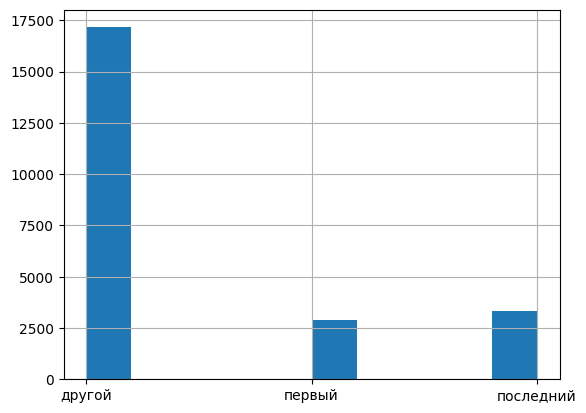

In [40]:
#изучим типы квартир в объявлениях
df['new_floor'].hist()
#логичное распределение, ничего особенного не видим

Тип этажа квартиры: статистика выглядит вполне очевидной, превый и последний этаж - почти одинаково.

<AxesSubplot:>

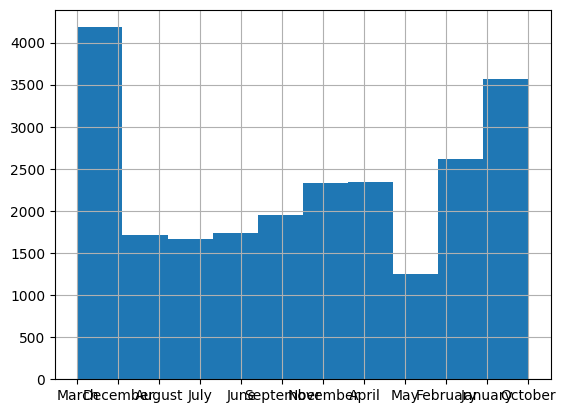

In [41]:
#изучим месяц публикации объявлений
df['month_exposition'].hist(range = (0, 11))

#Помогите с этим пунктом, пожалуйста. Я не понимаю, как сделать их от января к декабрю и чтобы читабельно было :)

В мае меньше всего объявлений. А март и октябрь показывают нам высокие значения.

общая площадь: нормальное распределение, медианное значение 52 кв метра, максимальное - 900 кв метров.  
жилая площадь: есть два пика, рекомендуется проверить исходные данные.  
площадь кухни: нормальное распределение, медианно значение 9 кв метра, максимальное - 112 кв метров.  
цена объекта: распределение цен нормальное, макс цена - 763 млн руб.  
количество комнат: распределение выглядит нормальным. Примичательно, что у кого-то 0 комнат. Возможно, это студии. А у кого-то целых 19 комнат. Медианное - 2 комнаты.  
этаж квартиры: нормальное распределение, медианное значение - 4 этаж.  
тип этажа квартиры («первый», «последний», «другой»): статистика выглядит вполне очевидной, превый и последний этаж - почти одинаково.  
общее количество этажей в доме: некоторые значения встречаются чаще.  
расстояние до центра города в метрах: с данными все впорядке, основной пик приходится на 10-20 км. от центра города.  
расстояние до ближайшего аэропорта: рядом с аэропортом почти никто не живет.  
расстояние до ближайшего парка: распределение нормальное.  
день и месяц публикации объявления: больше публикуют в будние, чем в выходные.  

In [42]:
#изучим как быстро продаются квартиры
df['days_exposition'].describe()

count    23371.000000
mean       156.868855
std        213.871607
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

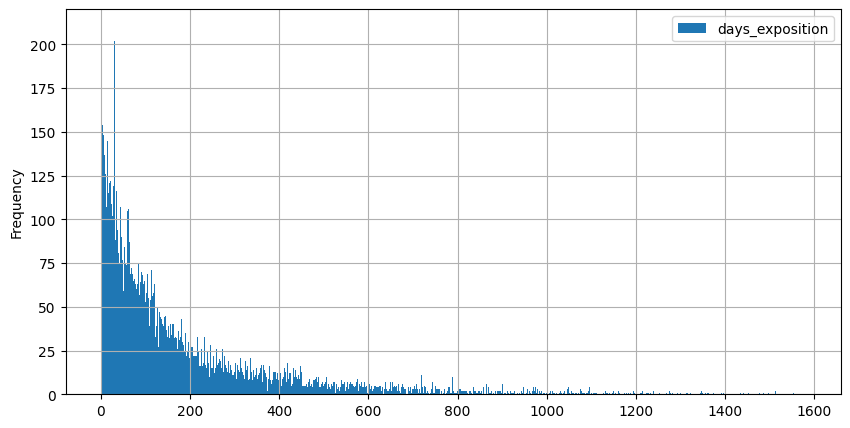

In [43]:
df.plot(y = 'days_exposition', ylim=(0, 220), kind = 'hist', bins =1580, grid=True, figsize = (10,5), range = (0, 1580))
#Заметен странный пик на значении примерно 30, надо увеличивать


<AxesSubplot:ylabel='Frequency'>

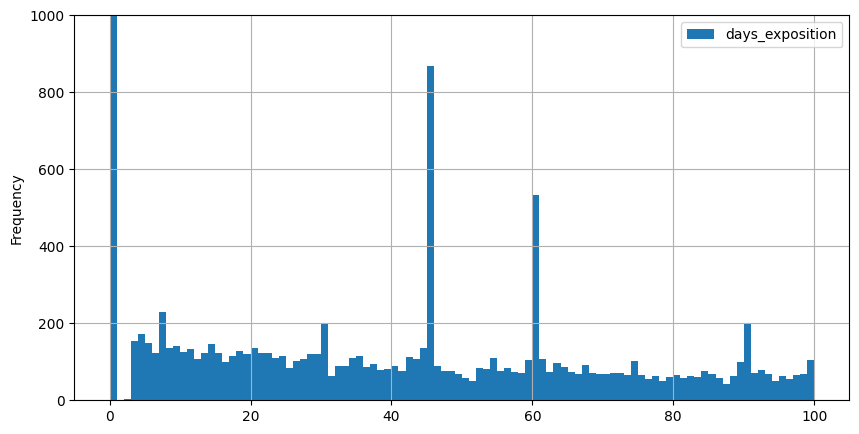

In [44]:
df.plot(y = 'days_exposition', ylim=(0, 1000),  kind = 'hist', bins =100, grid=True, figsize = (10,5), range = (0, 100))

Замечены резкие скачки на 45, 60 и 90 дни (автоматически закрываются на эти дни при отсутствии активности с объявлением? непонятно)  
Почему столько объявлений застревают на нуле? они не дописаны? в архиве? не продлили публикацию? не прошли модерацию? не ясно  
Средняя скорость продажи квартиры - 156 дней, медиана - 74 дня.  
Также выявлены аномально долгие продажи - 4,3 года... вероятно забывали отметить сделки закрытыми.

0.6530632549658346

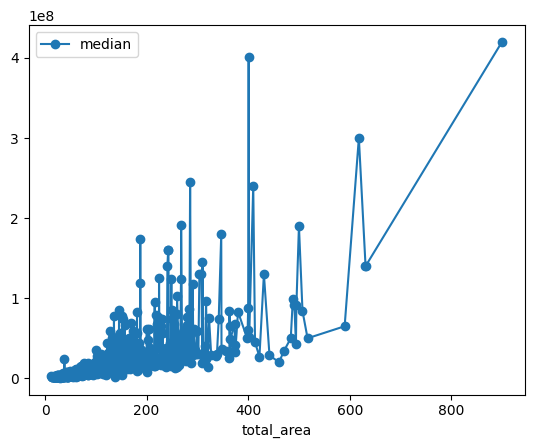

In [45]:
#Изучим зависимость цены от общей площади
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = '-o')
pivot_table_total_area.sort_values('median', ascending = False)
df['total_area'].corr(df['last_price'])

Цена напрямую зависит от площади, чем площадь больше - тем цена выше.

0.576421481406886

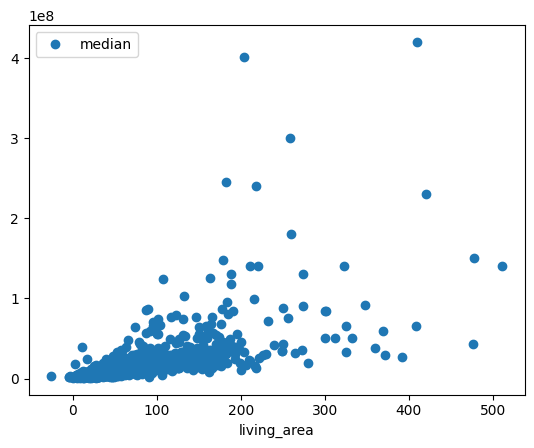

In [46]:
#Изучим зависимость цены от жилой площади
pivot_table_living_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')
pivot_table_living_area.sort_values('median', ascending = False)
df['living_area'].corr(df['last_price'])

Цена напрямую зависит от площади, чем площадь больше - тем цена выше.

0.45417008457942254

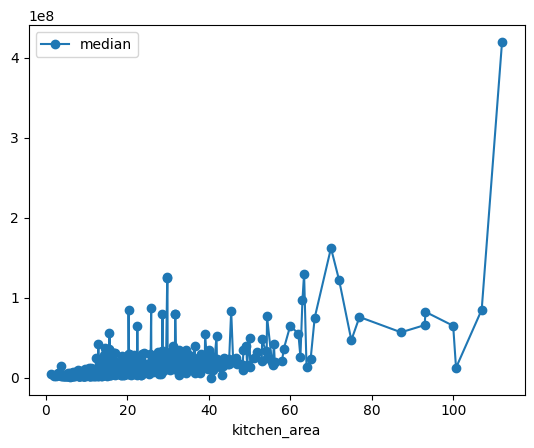

In [47]:
#Изучим зависимость цены от площади кухни
pivot_table_kitchen_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = '-o')
pivot_table_kitchen_area.sort_values('median', ascending = False)
df['kitchen_area'].corr(df['last_price'])

Цена напрямую зависит от площади, чем площадь больше - тем цена выше.

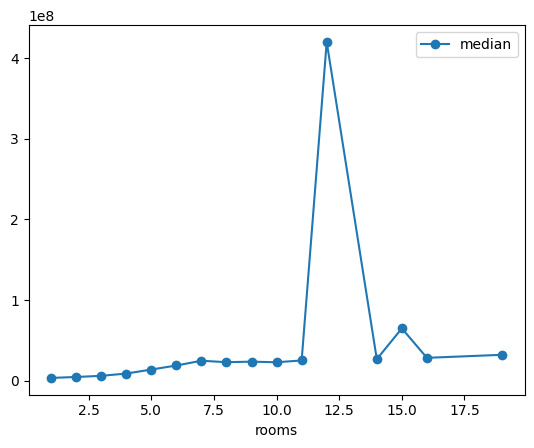

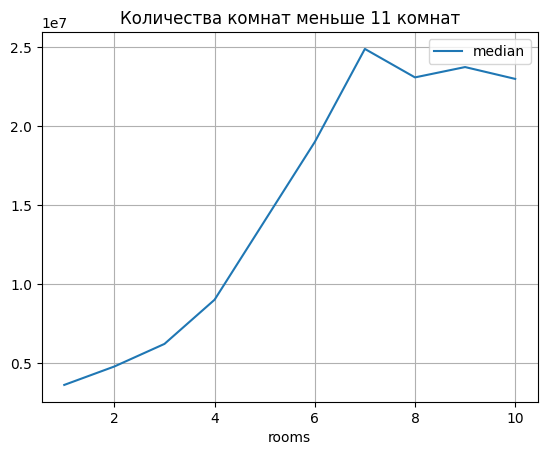

In [48]:
#Изучим зависимость цены от кол-ва комнат
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y = 'median', style = '-o')
pivot_table_rooms.sort_values('median', ascending = False)
df['rooms'].corr(df['last_price'])
pivot_table_rooms.query('rooms < 11').plot(y = 'median', grid=True, title = 'Количества комнат меньше 11 комнат')
plt.show()

Первый график немного завёл в тупик, но отрезав конец "больше 11 компнат" стало видно, что чем комнат в квартире больше, тем цена за квартиру выше.

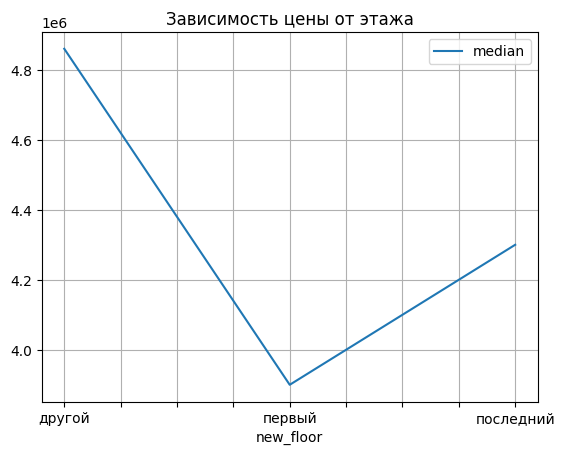

In [49]:
#Изучим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой);
pivot_table_floor = df.pivot_table(index = 'new_floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor.columns = ['mean', 'count', 'median']
pivot_table_floor.plot(y = 'median', grid=True, title = 'Зависимость цены от этажа')
pivot_table_floor.sort_values('new_floor', ascending = False)
plt.show()

Всё бьётся, квартиры на первом и последнем этаже всегда дешевле.

0.0015006624604595401

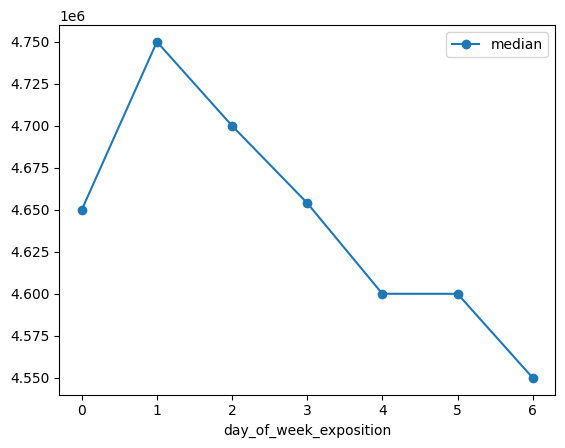

In [50]:
#Изучим зависимость цены от дня недели размещения
pivot_table_day_of_week_exposition = df.pivot_table(index = 'day_of_week_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_day_of_week_exposition.columns = ['mean', 'count', 'median']
pivot_table_day_of_week_exposition.plot(y = 'median', style = '-o')
pivot_table_day_of_week_exposition.sort_values('median', ascending = False)
df['day_of_week_exposition'].corr(df['last_price'])

В понедельник самая высокая цена, к выходным опускается.

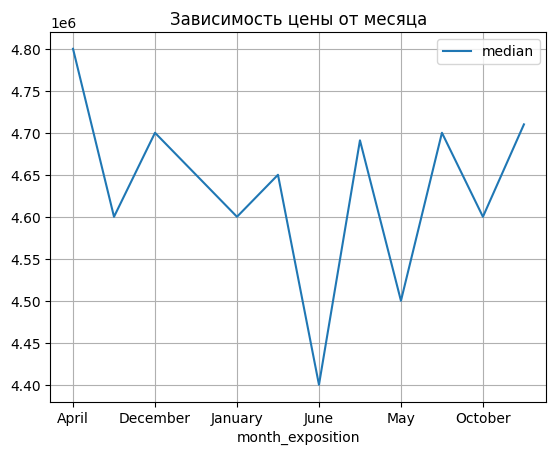

In [51]:
#Изучим зависимость цены от месяца размещения 
pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median', grid=True, title = 'Зависимость цены от месяца')
pivot_table_month_exposition.sort_values('month_exposition', ascending = False)
plt.show()


В июне мы не продаём ничего, не выгодно, как и в мае :)  
Самая высокая стоимость метра в апреле и августе! 
На рынке недвижимости присутствует сезонность - в начале лета наименьшее предложение как по количеству, так и по стоимости недвижимости. Вероятно это связано с отпусками.

-0.042865449185355356

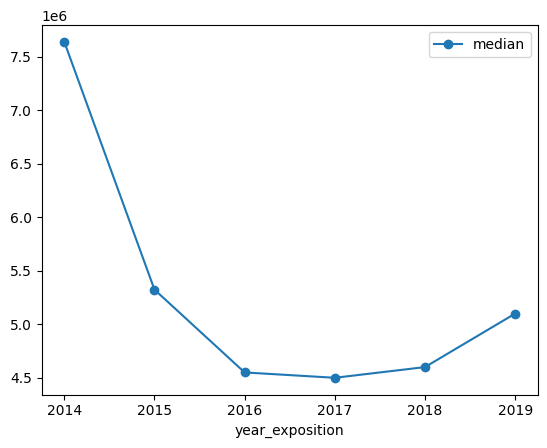

In [52]:
#Изучим зависимость цены от года размещения
pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median', style = '-o')
pivot_table_year_exposition.sort_values('median', ascending = False)
df['year_exposition'].corr(df['last_price'])

-0.07891658528427992

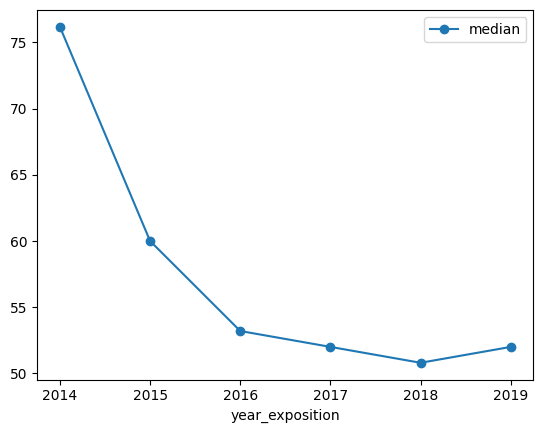

In [53]:
#Изучим зависимость площади квартир от года публикации
pivot_table_year_exposition_area = df.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition_area.columns = ['mean', 'count', 'median']
pivot_table_year_exposition_area.plot(y = 'median', style = '-o')
pivot_table_year_exposition_area.sort_values('median', ascending = False)
df['year_exposition'].corr(df['total_area'])

Обнаружена интересная взаимосвязь цены, года публикации и площади квартиры.  
С 2014 года мы видим падение как цены на квартиры, так и их общей площади. Следовательно цена относительно площади с 2014 по 2019 год практически не менялась (как мы посчитали ранее, чем больше площадь, тем выше цена и с этим анализом наш вывод тоже бьётся).

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.  
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [54]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc=['count', 'mean', 'median'])
locality_pivot_table.columns = ['count', 'mean', 'median']
locality_pivot_table_top = locality_pivot_table.sort_values('count', ascending = False).head(10)
display (locality_pivot_table_top)
#самая высокая стоимость
display (locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
#самая низкая стоимость
display (locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])

,count,mean,median
locality_name,,,
санкт-петербург,15542,114807.895380,104650.0
мурино,559,85469.352415,84969.0
кудрово,449,95083.131403,95185.0
шушары,435,78277.951724,76667.0
всеволожск,392,68618.015306,65789.0
пушкин,369,103125.818428,100000.0
колпино,338,75424.571006,74723.5
парголово,323,90289.755418,91918.0
гатчина,307,68746.110749,67797.0


,count,mean,median
locality_name,,,
зеленогорск,24,115122.75,101666.5


,count,mean,median
locality_name,,,
старополье,3,11206.333333,11000.0


Самая высокая стоимость квартир в Спб и Пушкине. Чем дальше от города, тем дешевле. В Выборге средняя цена примерно в 2 раза меньше, чем в Спб.

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Спб с помощью столбца locality_name и вычислим среднюю цену каждого километра.

-0.31443258637638716

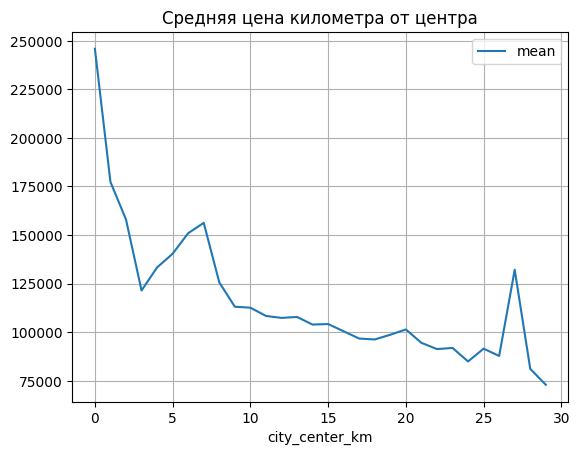

In [55]:
spb = df.query('locality_name == "санкт-петербург"')
cost_spb_km = spb.pivot_table(index = 'city_center_km', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
cost_spb_km.columns = ['mean', 'count', 'median']
cost_spb_km.plot(y = 'mean', grid = True, title = 'Средняя цена километра от центра')

cost_spb_km.sort_values('median', ascending = False)

spb['city_center_km'].corr(spb['price_meter'])


При удалении от центра цена падает.  
Заметен пик на 6-7 км (кажется, это самое удобное расположение квартиры, и рядом с центром, и одновременно немного поодаль) и на 22-23 км (возможно тут парки рядом играют роль) от центра. 

### Общий вывод

**Ознакомились с полученными данными:** обработали пропущенные значения там, настроили типизацию данных для удобной работы, изучили уникальные значения в столбце с названиями и устранили неявные дубликаты в названиях локаций, нашли и устранили редкие и выбивающиеся значения в высоте потолоков.

**Посчитали необходимые значения:** посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир, добавили значения расстояний в км.

**Провели исследовательский анализ данных:** больше всего квартиры размещают в будние дни в феврале, марте, апреле и осенью (сентябрь, октябрь, ноябрь), в среднем квартиры продаются от 45 дней до 232. Стоимость квартиры больше всего зависит от общей площади (наибольший показатель корреляции). Еще зависит от количества комнат (больше - дороже), и от первого и последнего этажа (они дешевле). Наибольшая цена квадратного метра в Спб и городах вблизи, Выборг в 2 раза дешевле Спб. Резкое падение цены после 3 км от центра. Есть резкое поднятие цены где-то на 6 км. Дальше идет плавный спад цены. 

**Чек-лист готовности проекта**

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод